In [4]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('heart.csv')

##EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    303 non-null    int64  
 1   gender                 303 non-null    int64  
 2   chestPain              303 non-null    int64  
 3   restingBloodPressure   303 non-null    int64  
 4   cholesterol            303 non-null    int64  
 5   fastingBloodSugar      303 non-null    int64  
 6   RestingECGresults      303 non-null    int64  
 7   maximumHeartRate       303 non-null    int64  
 8   exerciseInducedAngina  303 non-null    int64  
 9   oldpeak                303 non-null    float64
 10  slope                  303 non-null    int64  
 11  numberOfMajorVessels   303 non-null    int64  
 12  thalassemia            303 non-null    int64  
 13  target                 303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#Problem statement - To predict whether a person has a heart disease or not based on various health parameters.

In [8]:
data.shape

(303, 14)

In [9]:
data.isnull().sum()

age                      0
gender                   0
chestPain                0
restingBloodPressure     0
cholesterol              0
fastingBloodSugar        0
RestingECGresults        0
maximumHeartRate         0
exerciseInducedAngina    0
oldpeak                  0
slope                    0
numberOfMajorVessels     0
thalassemia              0
target                   0
dtype: int64

In [10]:
data.describe()

,age,gender,chestPain,restingBloodPressure,cholesterol,fastingBloodSugar,RestingECGresults,maximumHeartRate,exerciseInducedAngina,oldpeak,slope,numberOfMajorVessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
data.duplicated().sum()

1

In [12]:
data[data.duplicated()]

,age,gender,chestPain,restingBloodPressure,cholesterol,fastingBloodSugar,RestingECGresults,maximumHeartRate,exerciseInducedAngina,oldpeak,slope,numberOfMajorVessels,thalassemia,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [13]:
#there is 1 duplicate present, we can drop this.
data.drop_duplicates(inplace = True)

In [14]:
data['chestPain'].value_counts()

chestPain
0    143
2     86
1     50
3     23
Name: count, dtype: int64

#outliers

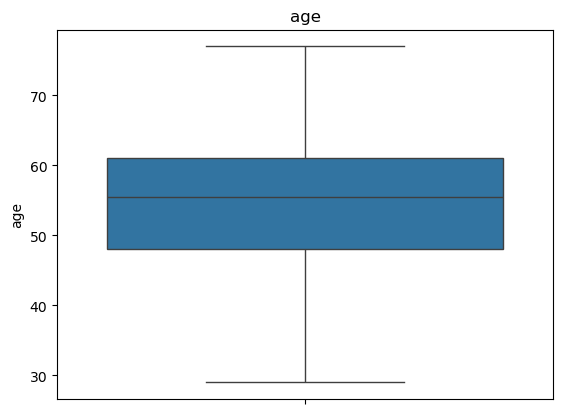

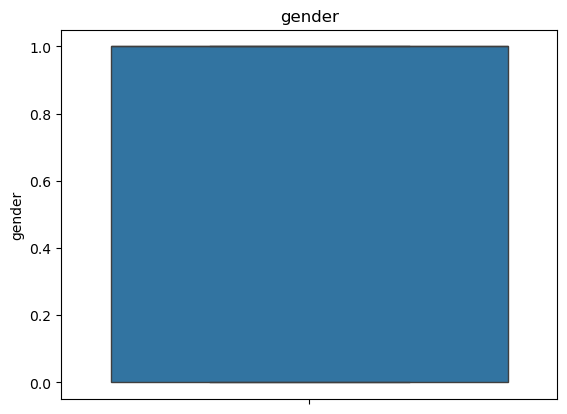

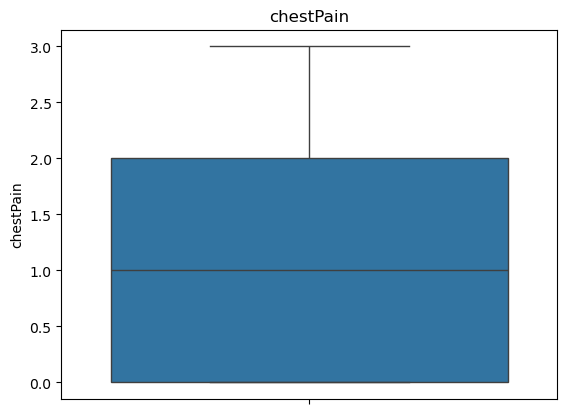

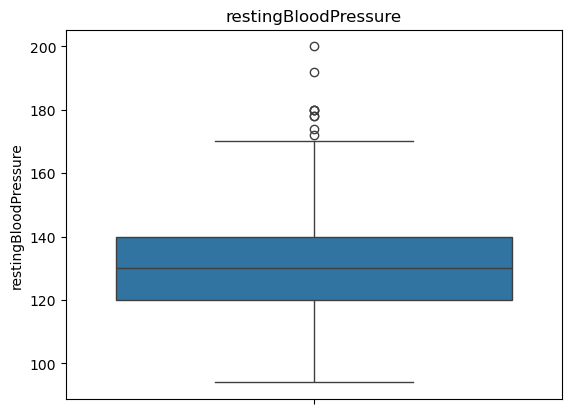

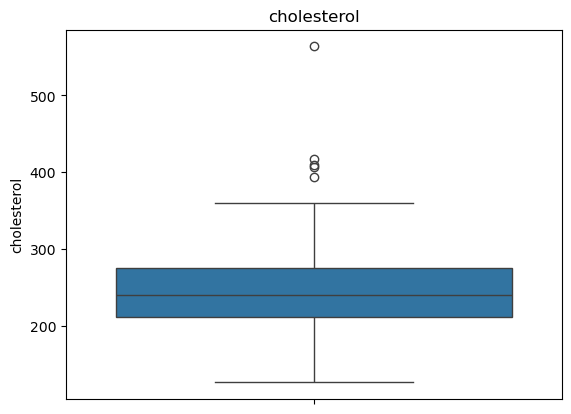

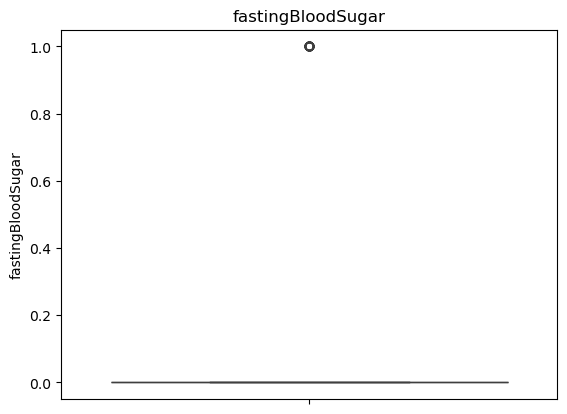

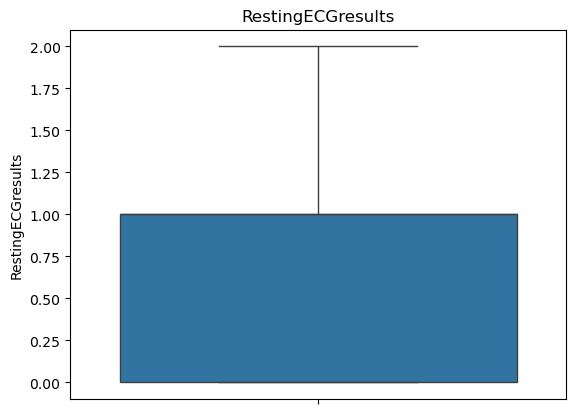

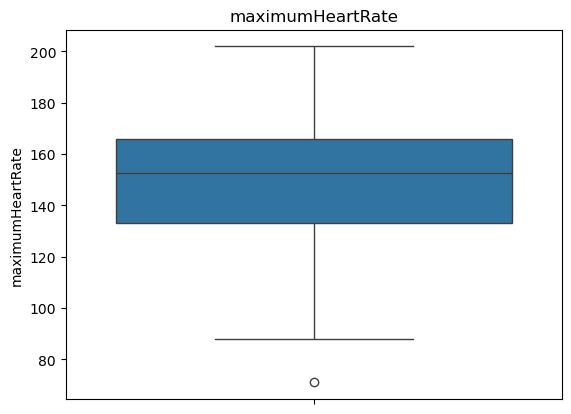

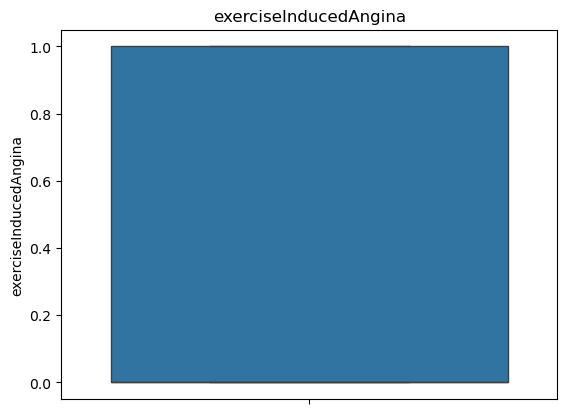

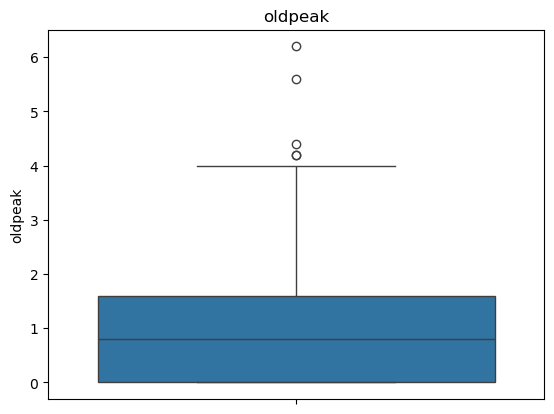

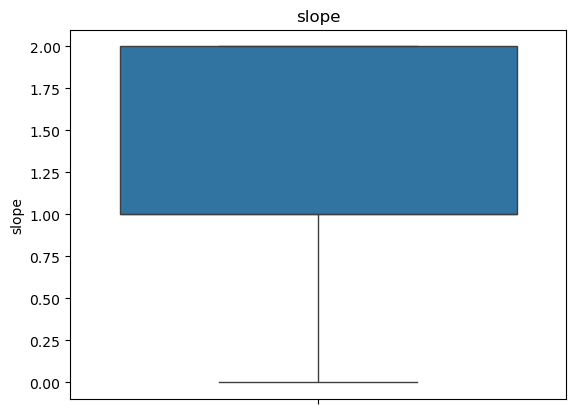

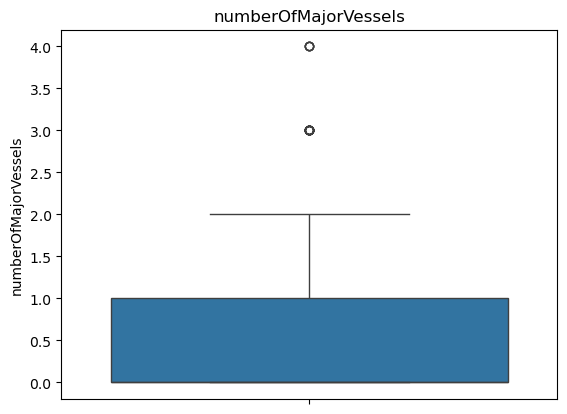

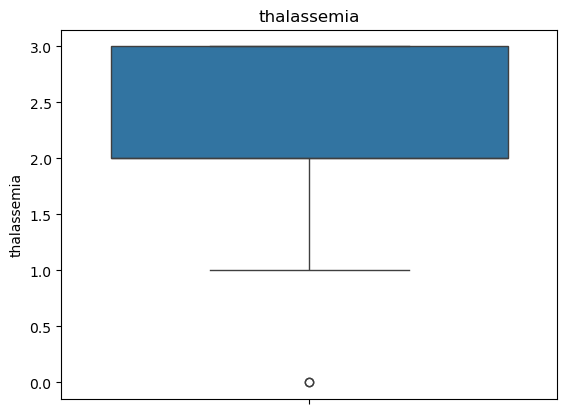

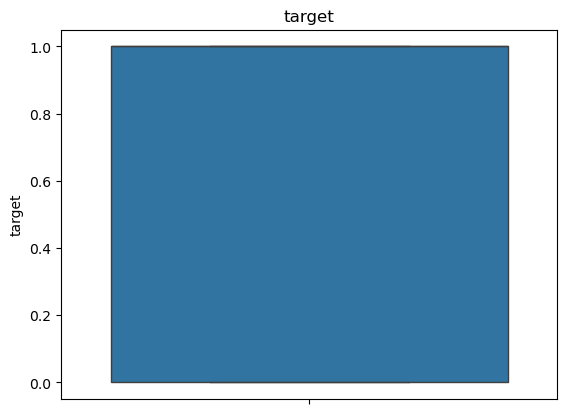

In [15]:
for i in data.columns:
  sns.boxplot(data[i])
  plt.title(i)
  plt.show()

In [16]:
#We have outliers in some columns but we will not remove them as it is medical data, may contains important info.

#Model Building

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [18]:
#Split the data into x and y
x = data.drop(columns = ['target'], axis = 1)
y = data['target']

In [19]:
x

,age,gender,chestPain,restingBloodPressure,cholesterol,fastingBloodSugar,RestingECGresults,maximumHeartRate,exerciseInducedAngina,oldpeak,slope,numberOfMajorVessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [20]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [21]:
#Test and train split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [22]:
#Initialise model
model = DecisionTreeClassifier()

In [23]:
#Train model
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [24]:
#Test the model
predicated_value = model.predict(x_test)

In [25]:
predicated_value

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

##Evaluation

In [26]:
from sklearn.metrics import *

In [27]:
#Accuracy

accuracy_score(y_test, predicated_value) * 100

78.68852459016394

In [28]:
print(classification_report(y_test, predicated_value))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        29
           1       0.81      0.78      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [29]:
confustion_matrix = confusion_matrix(y_test, predicated_value)
confustion_matrix

array([[23,  6],
       [ 7, 25]], dtype=int64)

##Decision Tree

In [30]:
from sklearn import tree

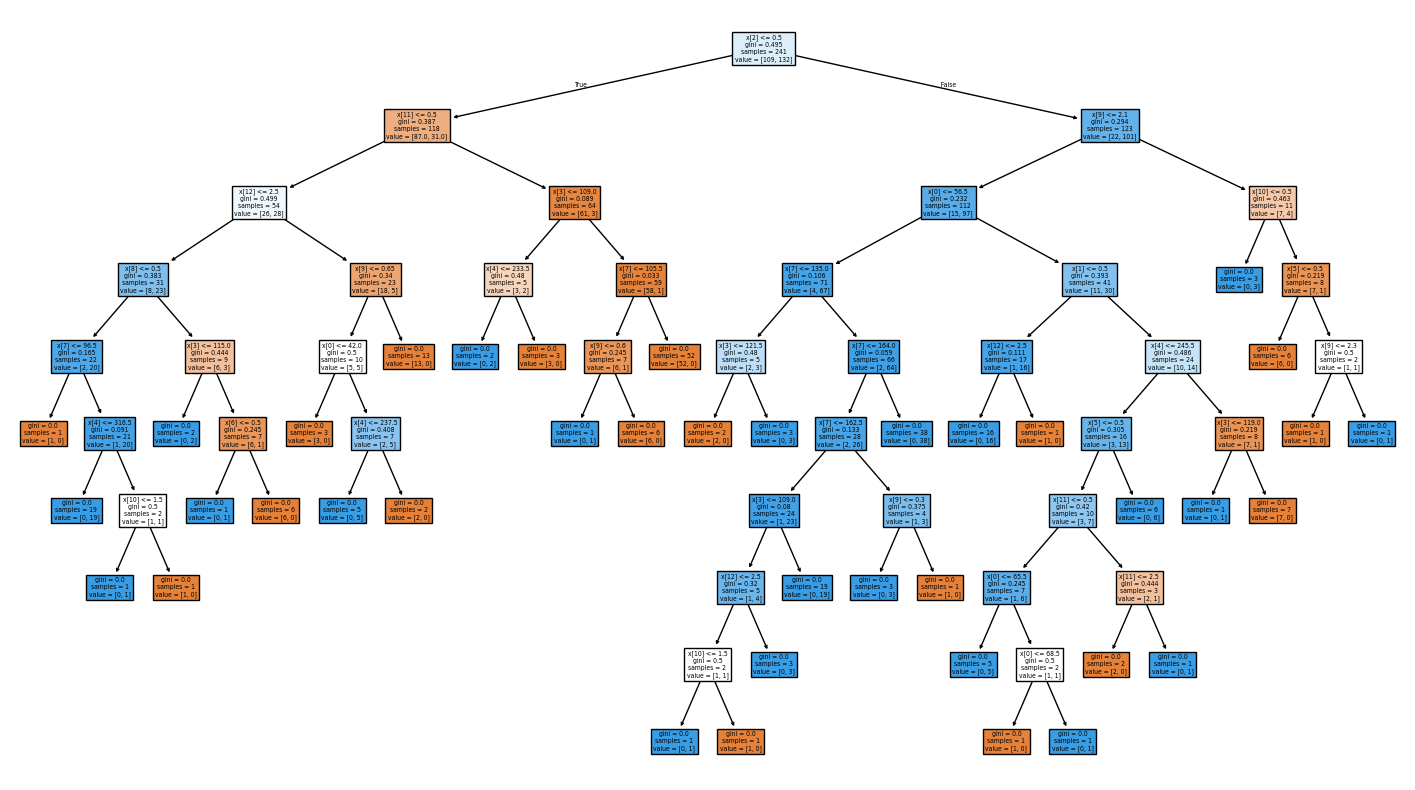

In [31]:
plt.figure(figsize = (18,10))
tree.plot_tree(model, filled = True)
plt.show()